In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm
import scipy.stats as stats

import numpy as np 

In [7]:
df_chennai= pd.read_csv("Chennai_hourly.csv")
df_mangalore=pd.read_csv("mangalore_hourly.csv")

In [30]:
df_chennai.head()



,YEAR,MO,DY,Date,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M
0,2012,1,1,01-01-2012,5,23.25,13.73,0.0,3.11,99.24,0.00,18.82,21.03,98.52
1,2012,1,1,01-01-2012,6,23.23,13.73,0.0,3.27,99.33,0.02,18.79,21.01,101.58
2,2012,1,1,01-01-2012,7,24.15,13.49,0.0,3.95,99.41,0.23,18.55,21.34,107.04
3,2012,1,1,01-01-2012,8,25.44,13.24,0.0,4.17,99.45,1.20,18.27,21.85,114.12
4,2012,1,1,01-01-2012,9,27.13,12.76,0.0,4.08,99.43,3.27,17.66,22.40,125.97


In [31]:
df_mangalore.head()

,YEAR,MO,DY,Date,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M
0,2012,1,1,01-01-2012,5,23.25,13.73,0.0,3.11,99.24,0.00,18.82,21.03,98.52
1,2012,1,1,01-01-2012,6,23.23,13.73,0.0,3.27,99.33,0.02,18.79,21.01,101.58
2,2012,1,1,01-01-2012,7,24.15,13.49,0.0,3.95,99.41,0.23,18.55,21.34,107.04
3,2012,1,1,01-01-2012,8,25.44,13.24,0.0,4.17,99.45,1.20,18.27,21.85,114.12
4,2012,1,1,01-01-2012,9,27.13,12.76,0.0,4.08,99.43,3.27,17.66,22.40,125.97


In [9]:
# Convert the date column to a datestamp type
df_chennai['DATE'] = pd.to_datetime(df.DATE)
df_chennai.head()

C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2012' in DD/MM/YYYY format. Provide format o

,YEAR,MO,DY,HR,DATE,DATE_HOUR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M,WS10M.1
0,2012,1,1,5,2012-01-01,1-1-2012 Hr - 5,23.53,17.21,0.51,3.22,100.67,0.00,22.71,23.12,107.64,3.22
1,2012,1,1,6,2012-01-01,1-1-2012 Hr - 6,24.30,17.76,0.49,3.20,100.76,0.02,23.21,23.76,110.43,3.20
2,2012,1,1,7,2012-01-01,1-1-2012 Hr - 7,25.62,18.37,0.50,3.99,100.86,0.52,23.81,24.72,113.76,3.99
3,2012,1,1,8,2012-01-01,1-1-2012 Hr - 8,26.51,18.43,0.45,4.69,100.90,1.73,23.86,25.18,116.82,4.69
4,2012,1,1,9,2012-01-01,1-1-2012 Hr - 9,27.32,18.37,0.44,5.18,100.87,3.95,23.82,25.57,118.07,5.18


In [32]:
# Convert the date column to a datestamp type
df_mangalore['DATE'] = pd.to_datetime(df.DATE)
df_mangalore.head()

C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Jeffrey\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2012' in DD/MM/YYYY format. Provide format o

,YEAR,MO,DY,Date,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M,DATE
0,2012,1,1,01-01-2012,5,23.25,13.73,0.0,3.11,99.24,0.00,18.82,21.03,98.52,2012-01-01
1,2012,1,1,01-01-2012,6,23.23,13.73,0.0,3.27,99.33,0.02,18.79,21.01,101.58,2012-01-01
2,2012,1,1,01-01-2012,7,24.15,13.49,0.0,3.95,99.41,0.23,18.55,21.34,107.04,2012-01-01
3,2012,1,1,01-01-2012,8,25.44,13.24,0.0,4.17,99.45,1.20,18.27,21.85,114.12,2012-01-01
4,2012,1,1,01-01-2012,9,27.13,12.76,0.0,4.08,99.43,3.27,17.66,22.40,125.97,2012-01-01


In [10]:
df_chennai.dtypes

YEAR                            int64
MO                              int64
DY                              int64
HR                              int64
DATE                   datetime64[ns]
DATE_HOUR                      object
T2M                           float64
QV2M                          float64
PRECTOTCORR                   float64
WS10M                         float64
PS                            float64
ALLSKY_SFC_UV_INDEX           float64
T2MDEW                        float64
T2MWET                        float64
WD10M                         float64
WS10M.1                       float64
dtype: object

In [34]:
print(df_chennai.isnull().sum())
print()
print(df_mangalore.isnull().sum())

YEAR                   0
MO                     0
DY                     0
HR                     0
DATE_HOUR              0
T2M                    0
QV2M                   0
PRECTOTCORR            0
WS10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
T2MDEW                 0
T2MWET                 0
WD10M                  0
WS10M.1                0
dtype: int64

YEAR                   0
MO                     0
DY                     0
Date                   0
HR                     0
T2M                    0
QV2M                   0
PRECTOTCORR            0
WS10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
T2MDEW                 0
T2MWET                 0
WD10M                  0
DATE                   0
dtype: int64


In [12]:
df_describe_chennai=df_chennai.drop(columns=['YEAR',"MO","DY","HR"])
df_describe_chennai.describe()

,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M,WS10M.1
count,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000
mean,27.979527,16.786147,0.143834,3.943035,100.328239,0.261771,22.028434,25.003973,155.202726,3.943035
std,3.799724,2.412088,0.480573,1.599008,0.392381,40.778495,2.470795,2.254878,89.491184,1.599008
min,17.830000,7.450000,0.000000,0.040000,98.270000,-999.000000,8.620000,16.340000,0.000000,0.040000
25%,25.500000,15.080000,0.000000,2.840000,100.020000,0.000000,20.480000,23.680000,68.200000,2.840000
50%,27.580000,17.030000,0.000000,3.800000,100.320000,0.000000,22.450000,25.370000,155.580000,3.800000
75%,30.200000,18.680000,0.070000,4.960000,100.640000,3.270000,23.960000,26.650000,230.490000,4.960000
max,41.420000,23.620000,15.480000,17.580000,101.500000,13.330000,27.810000,30.640000,359.920000,17.580000


In [35]:
df_describe_mangalore=df_mangalore.drop(columns=['YEAR',"MO","DY","HR"])
df_describe_mangalore.describe()

,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M
count,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000,87696.000000
mean,26.907785,16.909778,0.418779,2.693961,99.118074,1.026834,21.873129,24.390468,236.938718
std,2.799620,2.624244,0.863503,1.295151,0.229742,31.493454,2.896457,1.839980,88.364176
min,17.190000,5.490000,0.000000,0.010000,97.810000,-999.000000,4.250000,13.940000,0.000000
25%,25.010000,15.320000,0.000000,1.750000,98.960000,0.000000,20.510000,23.610000,215.337500
50%,26.440000,17.760000,0.030000,2.550000,99.110000,0.000000,22.900000,24.710000,267.730000
75%,28.260000,18.860000,0.460000,3.500000,99.270000,3.230000,23.930000,25.590000,292.450000
max,37.870000,21.850000,19.960000,13.130000,100.010000,14.150000,26.310000,28.830000,359.850000


In [41]:
# Set the date column as the index of your DataFrame discoveries
# df_chennai = df_chennai.set_index('DATE')
df_mangalore = df_mangalore.set_index('DATE')

df_mangalore.head()

,YEAR,MO,DY,Date,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M
DATE,,,,,,,,,,,,,,
2012-01-01,2012,1,1,01-01-2012,5,23.25,13.73,0.0,3.11,99.24,0.00,18.82,21.03,98.52
2012-01-01,2012,1,1,01-01-2012,6,23.23,13.73,0.0,3.27,99.33,0.02,18.79,21.01,101.58
2012-01-01,2012,1,1,01-01-2012,7,24.15,13.49,0.0,3.95,99.41,0.23,18.55,21.34,107.04
2012-01-01,2012,1,1,01-01-2012,8,25.44,13.24,0.0,4.17,99.45,1.20,18.27,21.85,114.12
2012-01-01,2012,1,1,01-01-2012,9,27.13,12.76,0.0,4.08,99.43,3.27,17.66,22.40,125.97


<AxesSubplot:xlabel='DATE_HOUR'>

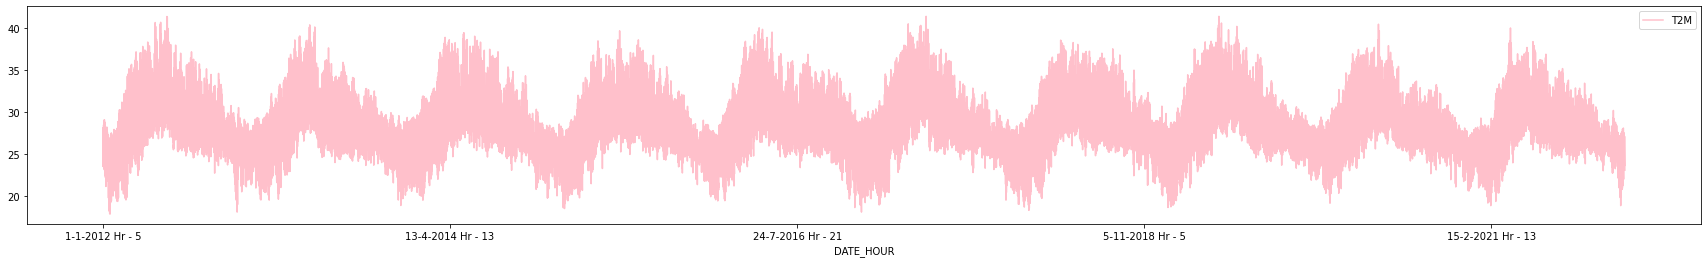

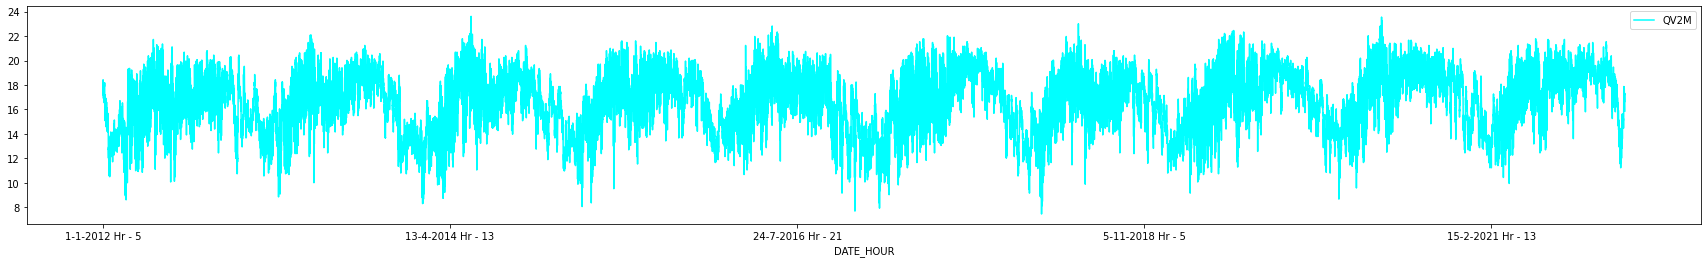

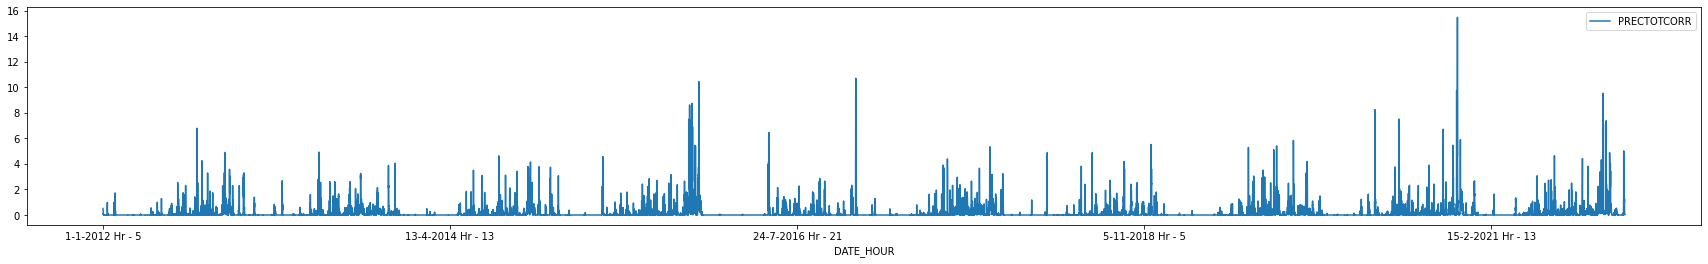

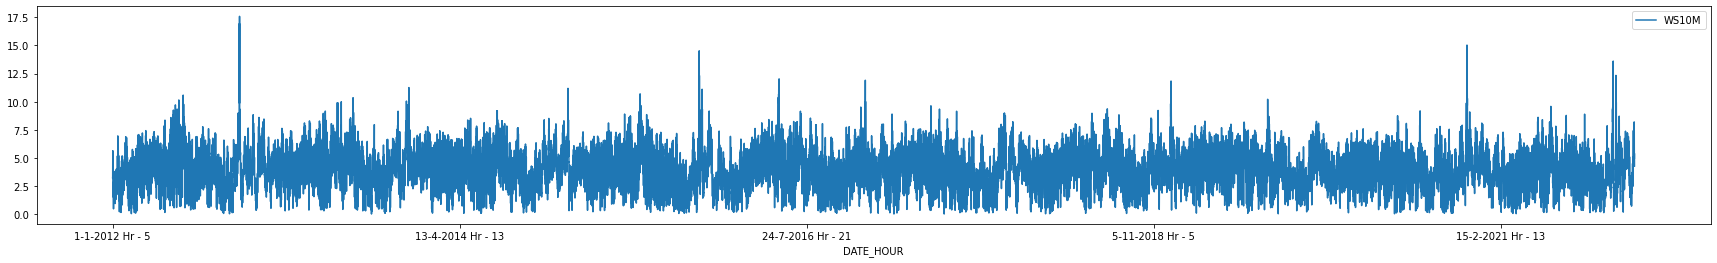

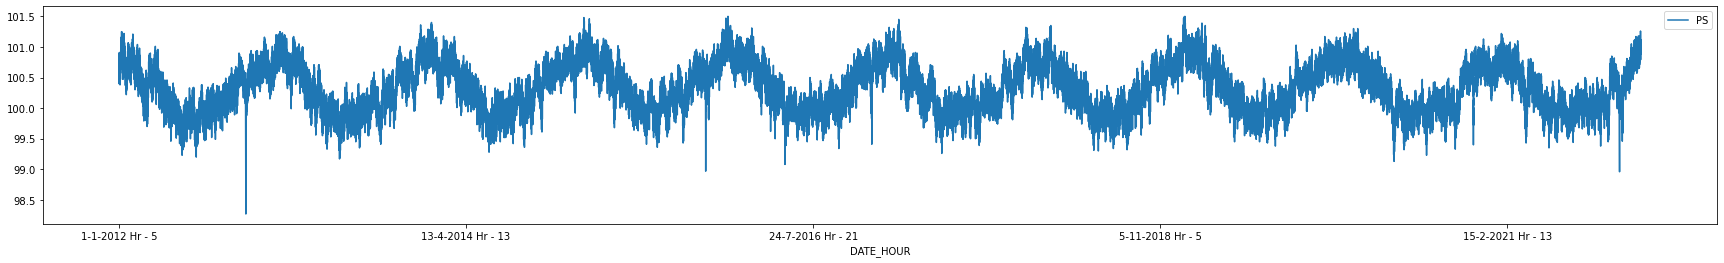

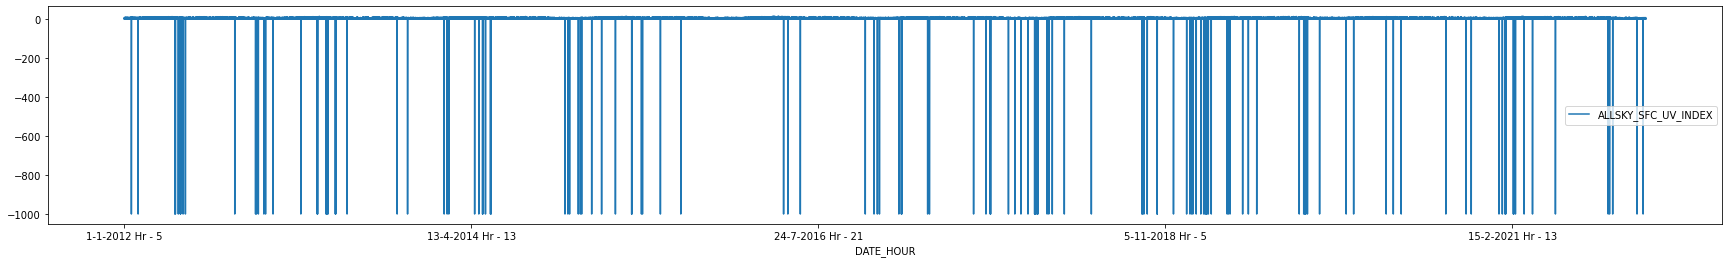

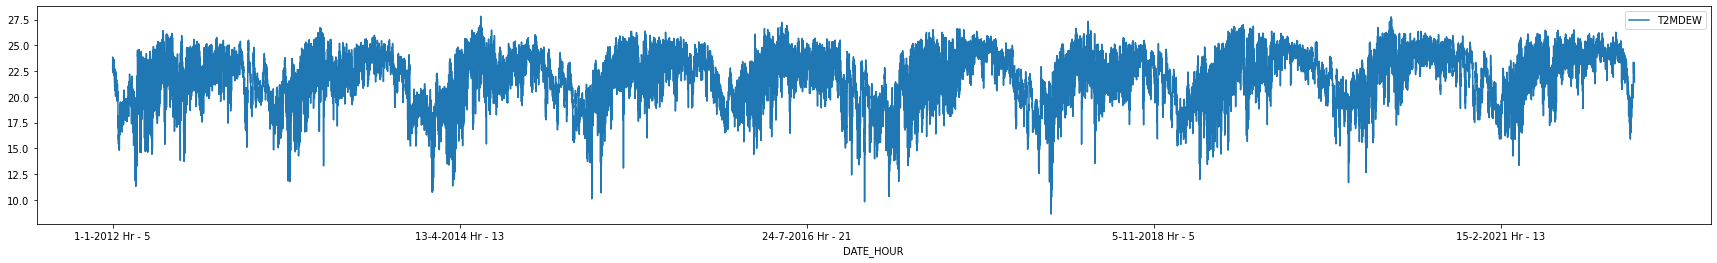

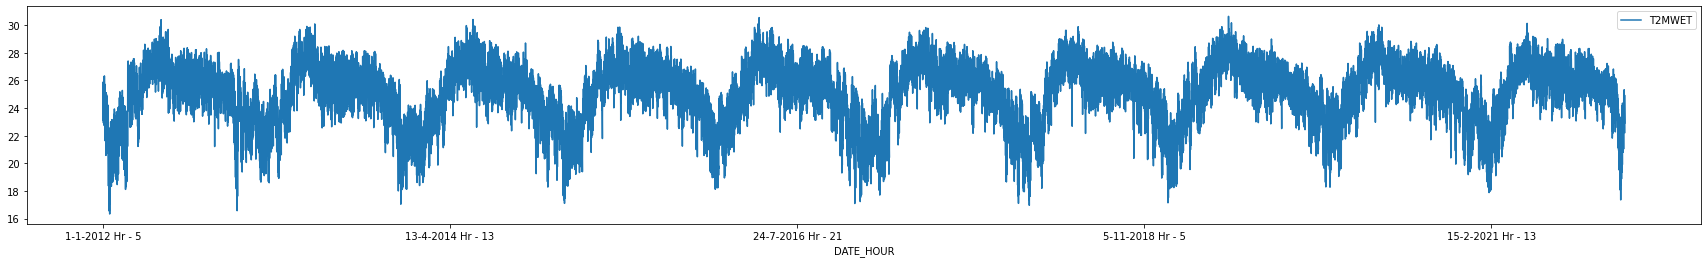

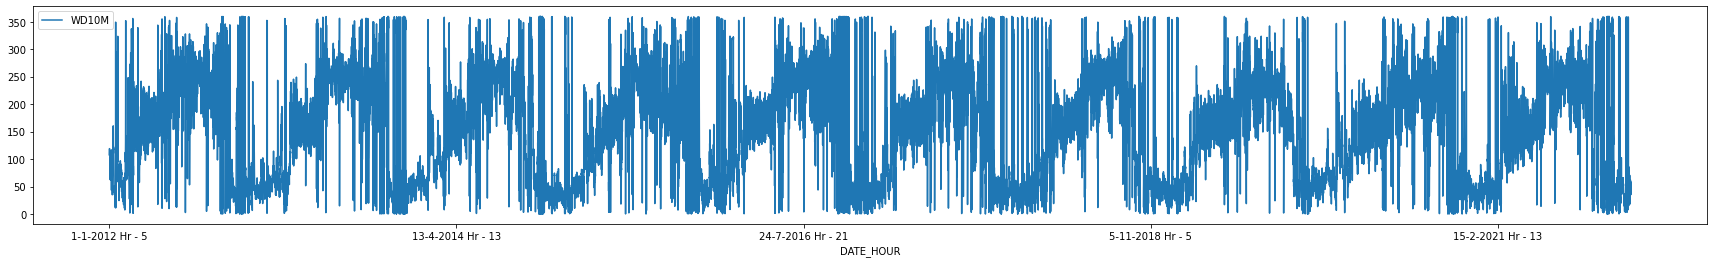

In [14]:
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["T2M"],c="pink") #plotting temperature over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["QV2M"],c="cyan") #plotting specific humidity over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["PRECTOTCORR"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["WS10M"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["PS"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["ALLSKY_SFC_UV_INDEX"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["T2MDEW"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["T2MWET"]) #plotting precipitation over all years
df_chennai.plot(figsize=(30,4),x="DATE_HOUR",y=["WD10M"]) #plotting precipitation over all years

In [42]:
# get formula for fate_hour from thejaswi's csv
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["T2M"],c="pink") #plotting temperature over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["QV2M"],c="cyan") #plotting specific humidity over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["PRECTOTCORR"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["WS10M"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["PS"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["ALLSKY_SFC_UV_INDEX"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["T2MDEW"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["T2MWET"]) #plotting precipitation over all years
df_mangalore.plot(figsize=(30,4),x="DATE_HOUR",y=["WD10M"]) #plotting precipitation over all years

KeyError: 'DATE_HOUR'

In [15]:
# # commented code
# df1_chennai = pd.DataFrame()
# temp_avg=[]
# for i in range(1,13):
#     temp_avg.append( df[df['MO']==i]['T2M'].mean())
# #     df1 = df1.append({'YEAR':'Jane', 'MO':i, 'T2M_avg':df[df['MO']==i]['T2M'].mean()}, ignore_index=True)
# temp_avg

In [16]:
# df1 = pd.DataFrame()
# temp_avg=[]
# for j in range(2012,2023):
#     for i in range(1,13):
#         #     temp_avg.append( df[df['MO']==i]['T2M'].mean())
#         df1 = df1.append({'YEAR':2012, 'MO':i, 'T2M_avg':df[df['MO']==i and df['YEAR']==j]['T2M'].mean()}, ignore_index=True)
# df1.head()

In [17]:

# Resampling the time series data based on monthly 'M' frequency
df_month_chennai = df_chennai.resample("M").mean()
df_month_chennai.head()

,YEAR,MO,DY,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M,WS10M.1
DATE,,,,,,,,,,,,,,
2012-01-31,2012.0,3.143437,13.958051,11.564276,24.887781,14.419093,0.041069,3.834060,100.497240,-2.219080,19.611245,22.249418,118.767415,3.834060
2012-02-29,2012.0,3.862069,13.137931,11.500000,26.635675,14.982730,0.021408,3.668333,100.361135,2.055057,20.134526,23.385101,141.030503,3.668333
2012-03-31,2012.0,4.354839,14.645161,11.500000,28.885215,16.124073,0.080645,4.218629,100.406761,-0.578656,21.307218,25.096008,158.281747,4.218629
2012-04-30,2012.0,5.000000,14.500000,11.500000,29.719125,17.306125,0.096125,4.178139,100.152028,2.273278,22.485458,26.102389,165.669542,4.178139
2012-05-31,2012.0,5.580645,15.419355,11.500000,30.908911,17.135309,0.034987,4.577003,99.974772,-4.750323,22.334530,26.621707,197.207513,4.577003


In [43]:

# Resampling the time series data based on monthly 'M' frequency
df_month_mangalore = df_mangalore.resample("M").mean()
df_month_mangalore.head()

,YEAR,MO,DY,HR,T2M,QV2M,PRECTOTCORR,WS10M,PS,ALLSKY_SFC_UV_INDEX,T2MDEW,T2MWET,WD10M
DATE,,,,,,,,,,,,,
2012-01-31,2012.0,3.143437,13.958051,11.564276,25.773153,13.971786,0.189269,2.803681,99.143221,-0.728187,18.648444,22.210853,218.996955
2012-02-29,2012.0,3.862069,13.137931,11.500000,27.404626,14.220259,0.245905,2.591006,99.067500,2.178448,18.660704,23.032759,221.369756
2012-03-31,2012.0,4.354839,14.645161,11.500000,28.081237,16.155511,0.186976,2.724153,99.180188,2.326277,21.130349,24.605739,248.214476
2012-04-30,2012.0,5.000000,14.500000,11.500000,27.550111,17.624556,0.288847,2.648486,98.993514,2.274194,22.654556,25.102319,270.018653
2012-05-31,2012.0,5.580645,15.419355,11.500000,27.895645,17.743387,0.136546,3.184476,98.994919,0.798360,22.822043,25.358696,275.730954


<BarContainer object of 122 artists>

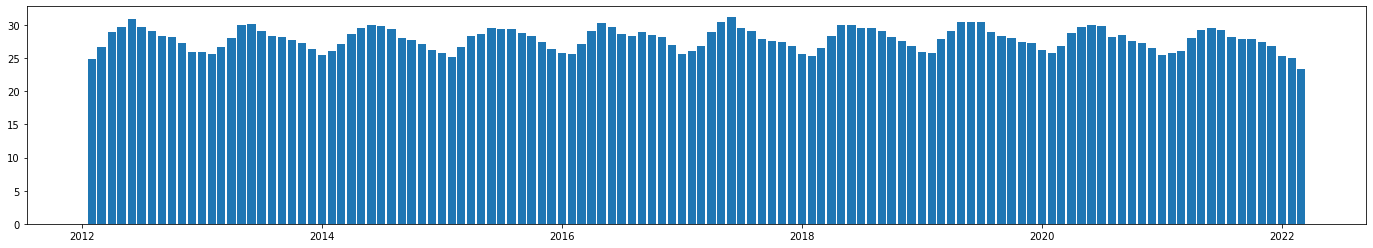

In [18]:
# monthly average of temperature chennai
# using subplot
fig, ax = plt.subplots(figsize=(24, 4))
  
# plotting bar graph
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "T2M"], 
       width=25, align='center')

<BarContainer object of 122 artists>

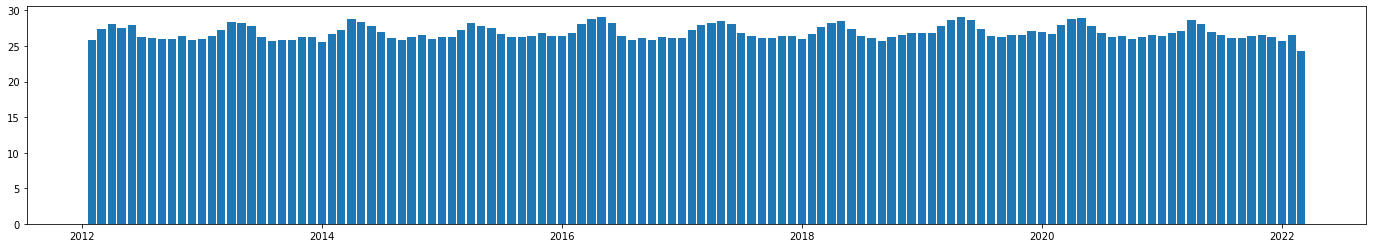

In [44]:
# monthly average of temperature mangalore
# using subplot
fig, ax = plt.subplots(figsize=(24, 4))
  
# plotting bar graph
ax.bar(df_month_mangalore['2012':].index, 
       df_month_mangalore.loc['2012':, "T2M"], 
       width=25, align='center')

<BarContainer object of 122 artists>

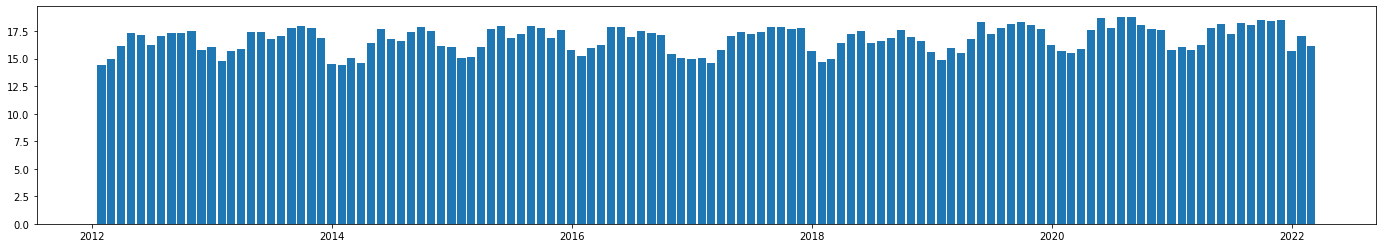

In [19]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "QV2M"], 
       width=25, align='center')

<BarContainer object of 122 artists>

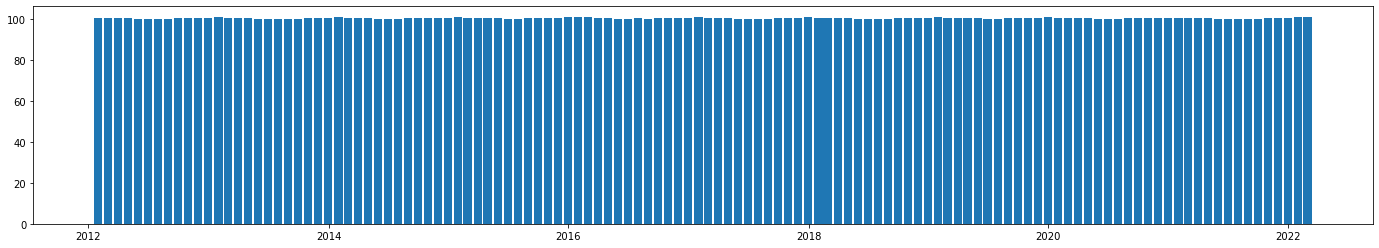

In [20]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "PS"], 
       width=25, align='center')

<BarContainer object of 122 artists>

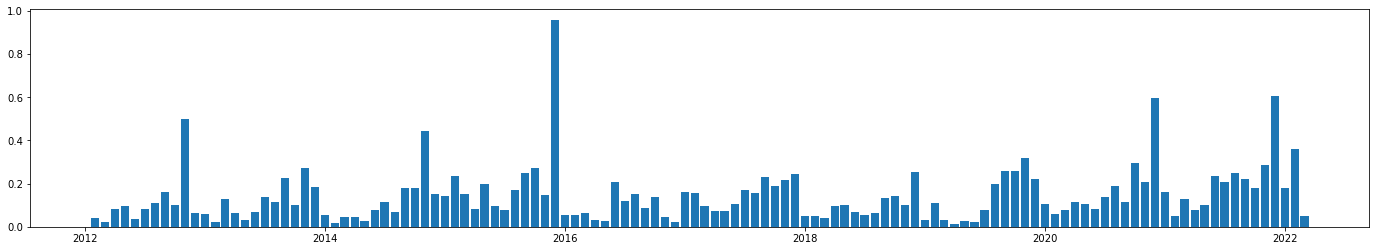

In [22]:
# monthly average of relative precipitation chennai
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "PRECTOTCORR"], 
       width=25, align='center')

<BarContainer object of 122 artists>

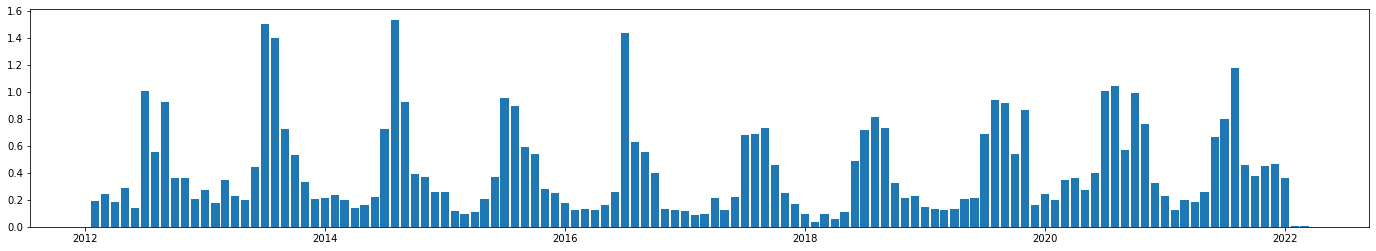

In [45]:
# monthly average of precipitation mangalore
# using subplot
fig, ax = plt.subplots(figsize=(24, 4))
  
# plotting bar graph
ax.bar(df_month_mangalore['2012':].index, 
       df_month_mangalore.loc['2012':, "PRECTOTCORR"], 
       width=25, align='center')

<BarContainer object of 122 artists>

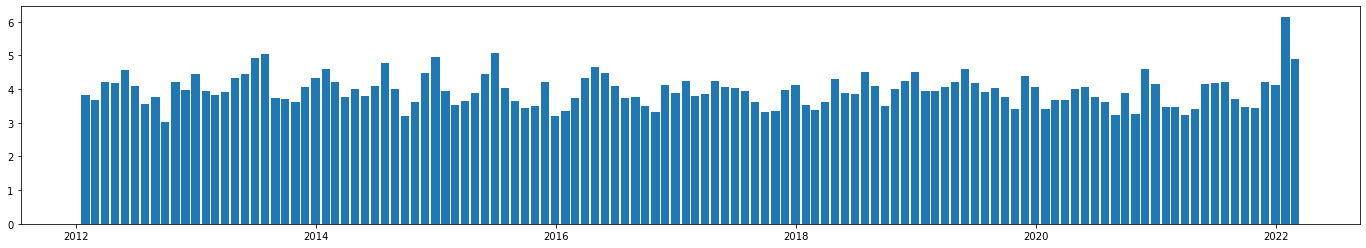

In [23]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "WS10M"], 
       width=25, align='center')

<BarContainer object of 122 artists>

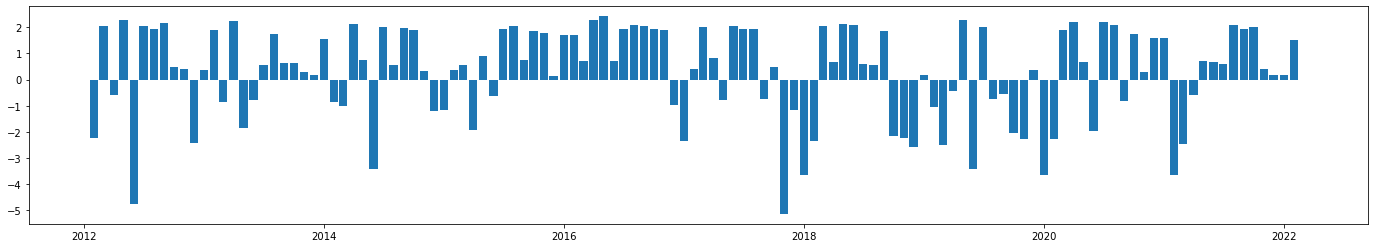

In [24]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "ALLSKY_SFC_UV_INDEX"], 
       width=25, align='center')

<BarContainer object of 122 artists>

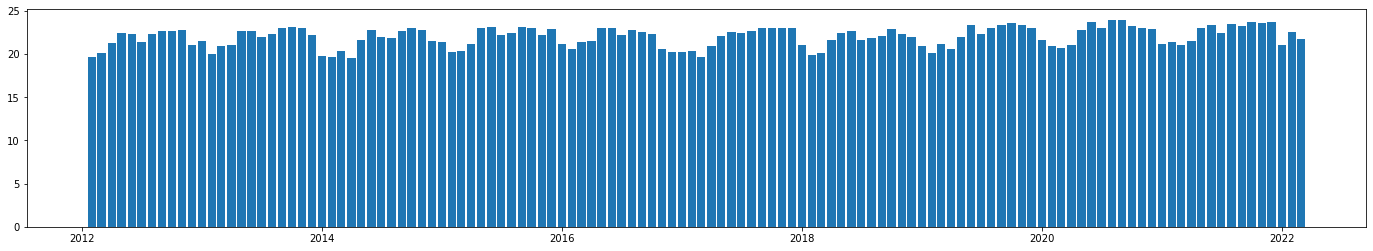

In [25]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "T2MDEW"], 
       width=25, align='center')

<BarContainer object of 122 artists>

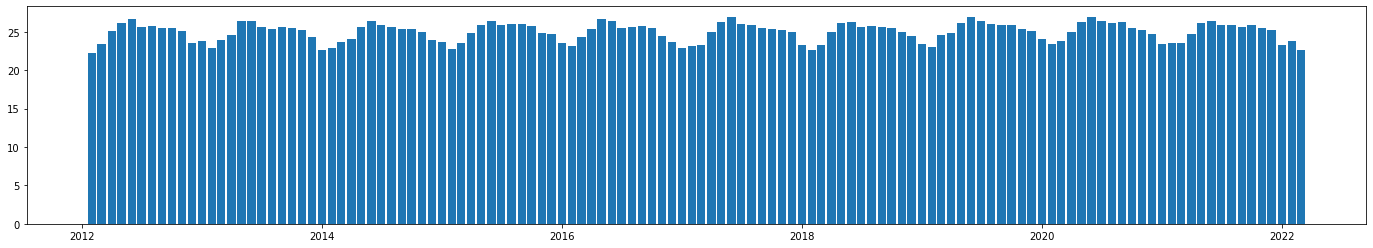

In [26]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "T2MWET"], 
       width=25, align='center')

<BarContainer object of 122 artists>

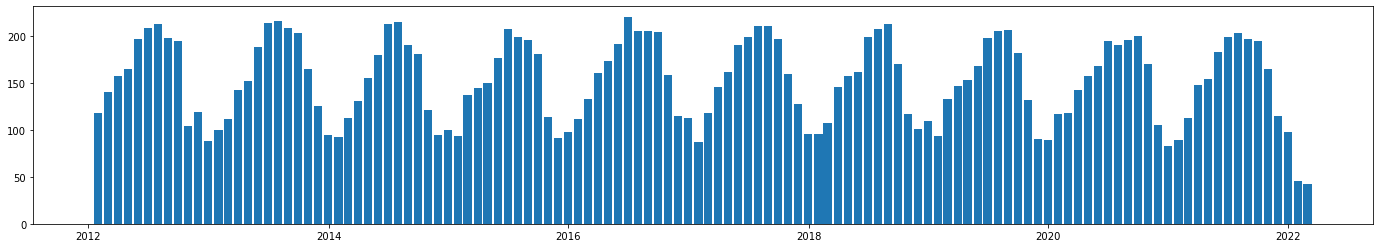

In [29]:
# monthly average of relative humidity
fig, ax = plt.subplots(figsize=(24, 4))
ax.bar(df_month_chennai['2012':].index, 
       df_month_chennai.loc['2012':, "WD10M"], 
       width=25, align='center')

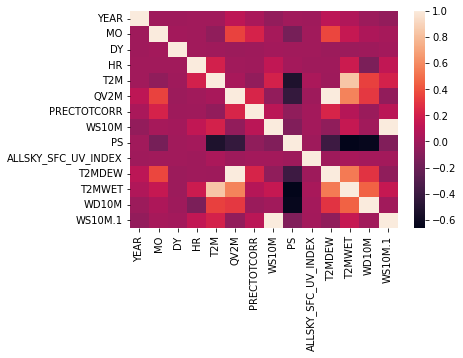

In [46]:
heatmap = sns.heatmap(df_chennai.corr())

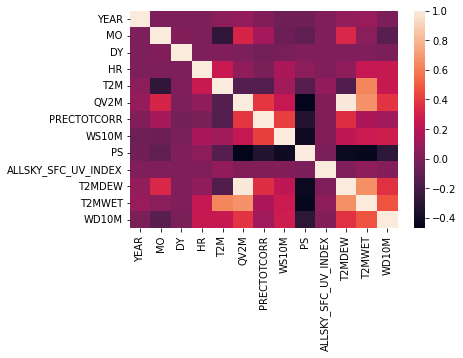

In [47]:
heatmap = sns.heatmap(df_mangalore.corr())

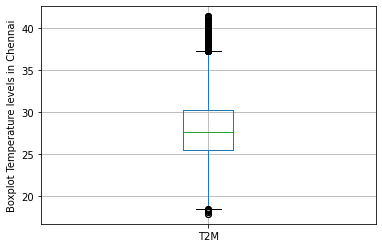

In [52]:
# Generate a boxplot
ax = df_describe[['T2M']].boxplot()

# Set the labels and display the plot
# ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot Temperature levels in Chennai', fontsize=10);

In [92]:
# to group an attribute monthly based on it sum
def monthly_group_sum(df, year,attribute):
#     x=df.loc[df['YEAR']==year]
    x=df
    x=x[['MO',attribute]].copy()
    x=x.groupby('MO').sum()
    return x

In [93]:
# to group an attribute monthly based on it mean
def monthly_group_mean(df, year,attribute):
#     x=df.loc[df['YEAR']==year]
    x=df
    x=x[['MO',attribute]].copy()
    x=x.groupby('MO').mean()
    return x

In [104]:
def plot_multi_bar(X,Y,Z,xlabel,ylabel,title,legendy,legendz):
    X_axis = np.arange(len(X))
    fig, ax = plt.subplots(figsize=(24, 8))  
    plt.bar(X_axis - 0.2, Y, 0.4, label = legendy)
    plt.bar(X_axis + 0.2, Z, 0.4, label = legendz)

    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend()
    plt.show()

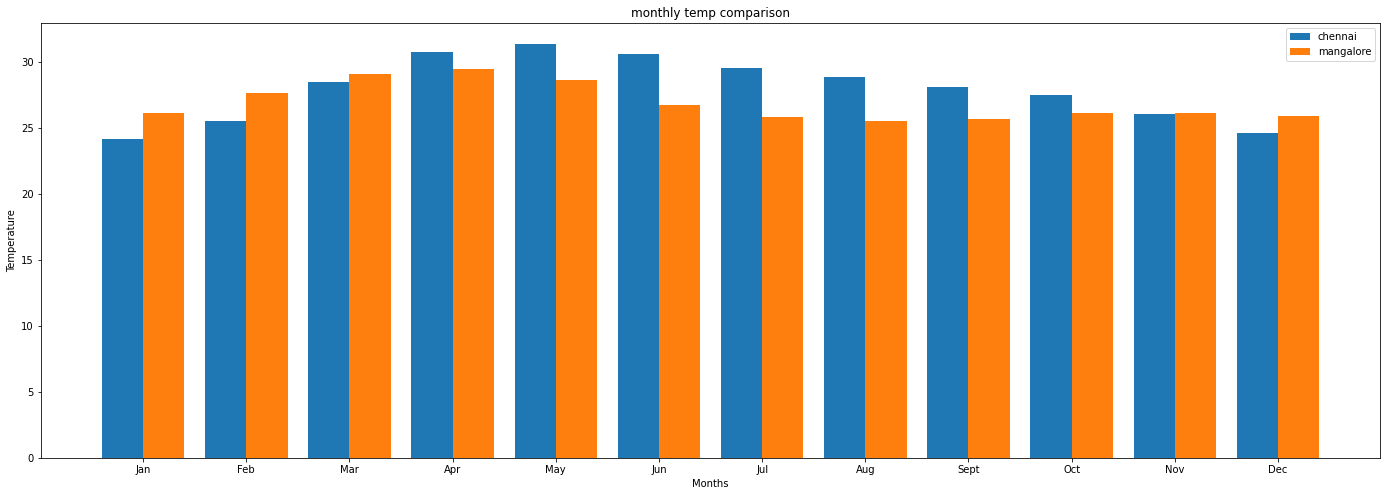

In [105]:
# monthly comparison of avg temp between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'T2M')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'T2M')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['T2M'],df_mangalore_monthlytemp['T2M'],
               "Months","Temperature","monthly temp comparison","chennai","mangalore")

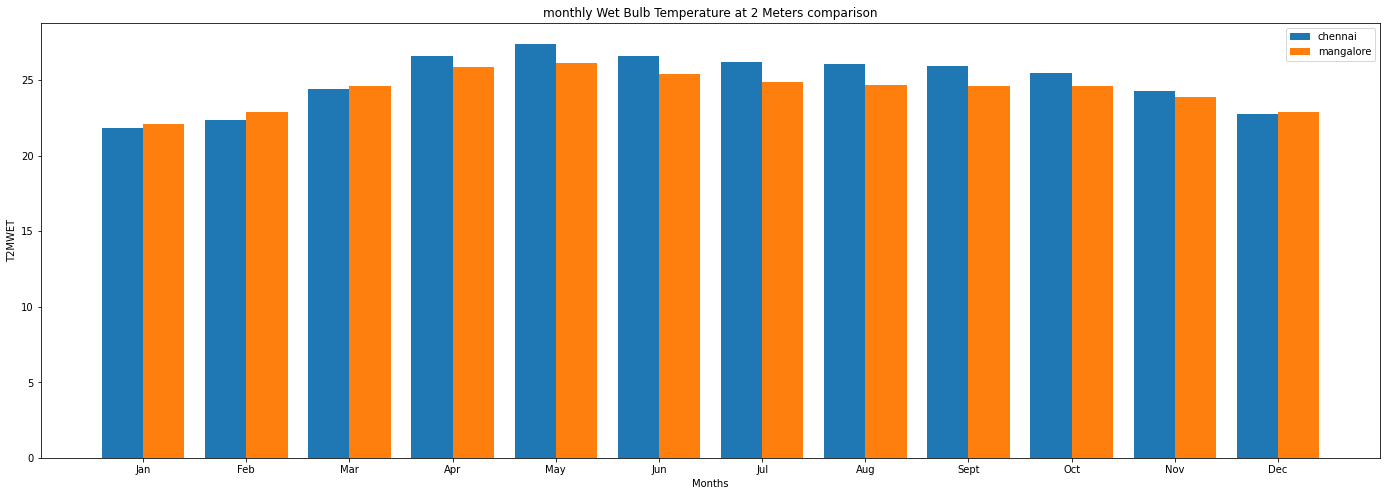

In [109]:
# monthly comparison of avg Wet Bulb Temperature at 2 Meters between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'T2MWET')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'T2MWET')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['T2MWET'],df_mangalore_monthlytemp['T2MWET'],
               "Months","T2MWET","monthly Wet Bulb Temperature at 2 Meters comparison","chennai","mangalore")

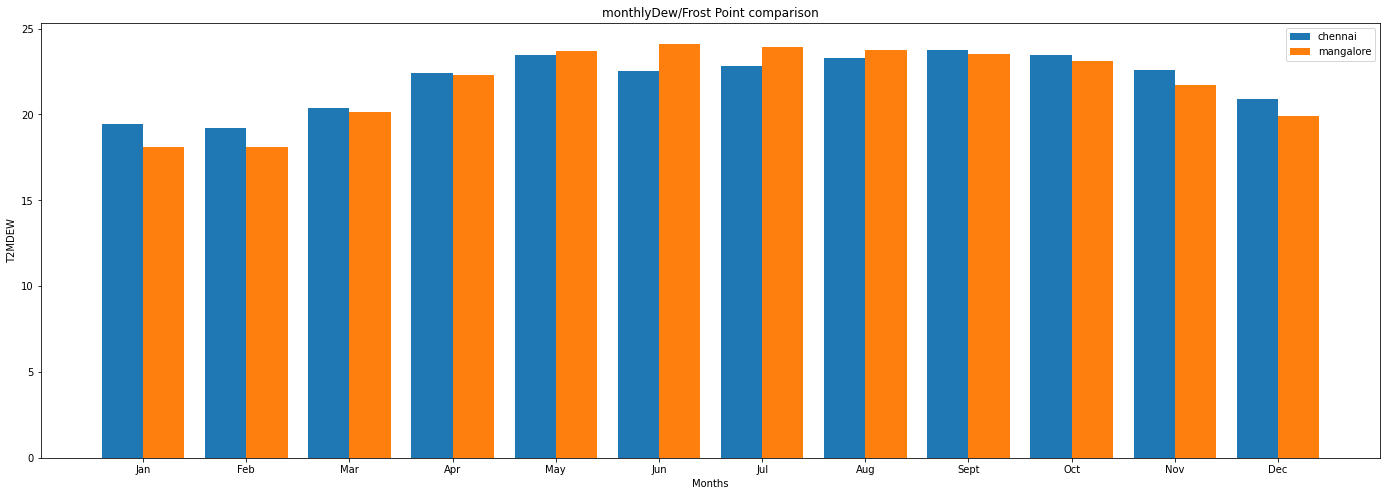

In [110]:
# monthly comparison of avg Dew/Frost Point between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'T2MDEW')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'T2MDEW')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['T2MDEW'],df_mangalore_monthlytemp['T2MDEW'],
               "Months","T2MDEW","monthlyDew/Frost Point comparison","chennai","mangalore")

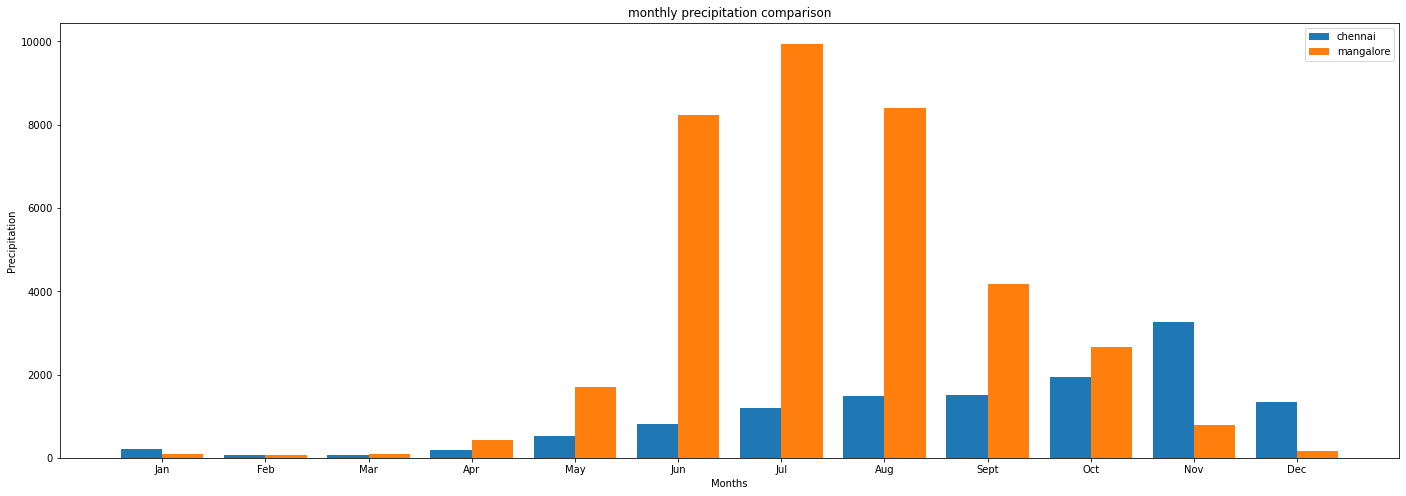

In [106]:
# monthly comparison of total precipitation between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_sum(df_chennai,2015,'PRECTOTCORR')
df_mangalore_monthlytemp=monthly_group_sum(df_mangalore,2015,'PRECTOTCORR')
# df_chennai_monthlytemp.head()

plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['PRECTOTCORR'],df_mangalore_monthlytemp['PRECTOTCORR'],
               "Months","Precipitation","monthly precipitation comparison","chennai","mangalore")

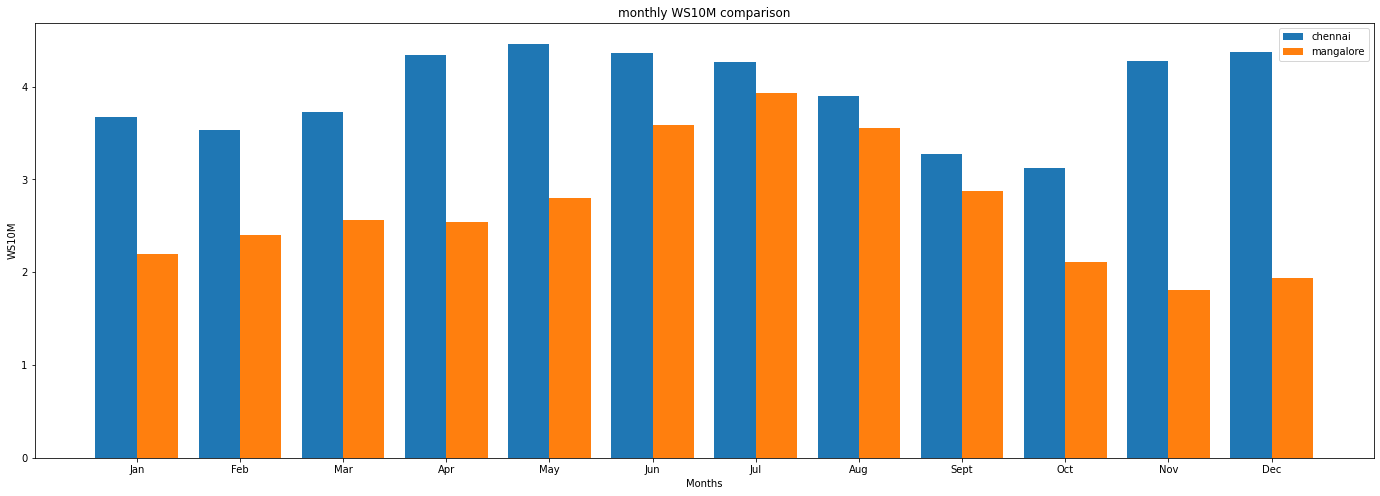

In [107]:
# monthly comparison of avg windspeed between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'WS10M')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'WS10M')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['WS10M'],df_mangalore_monthlytemp['WS10M'],
               "Months","WS10M","monthly WS10M comparison","chennai","mangalore")

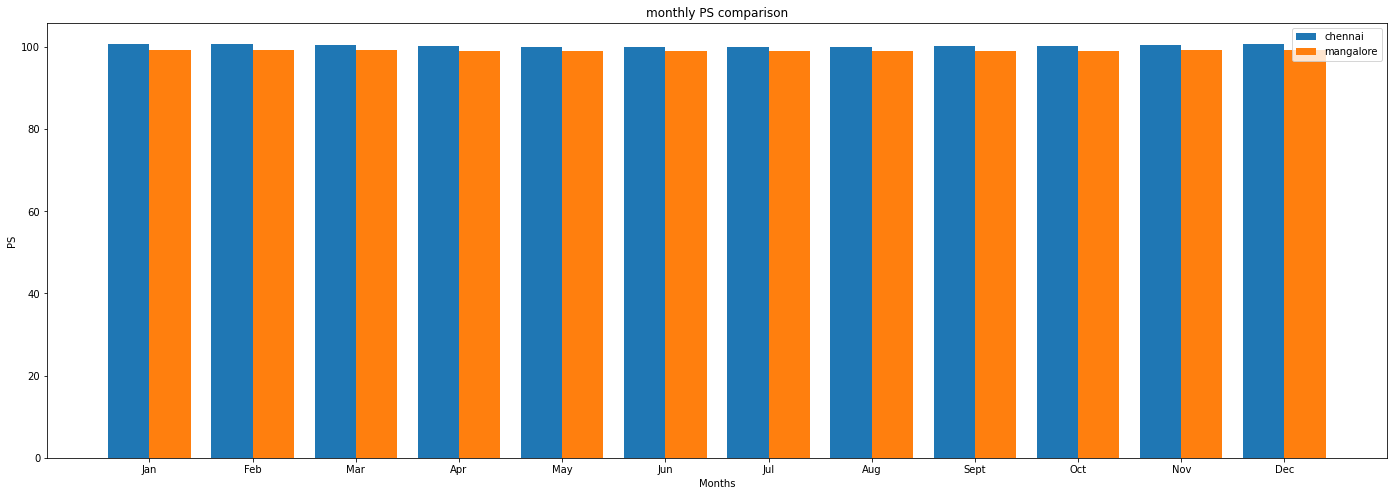

In [108]:
# monthly comparison of avg surface pressure between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'PS')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'PS')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['PS'],df_mangalore_monthlytemp['PS'],
               "Months","PS","monthly PS comparison","chennai","mangalore")

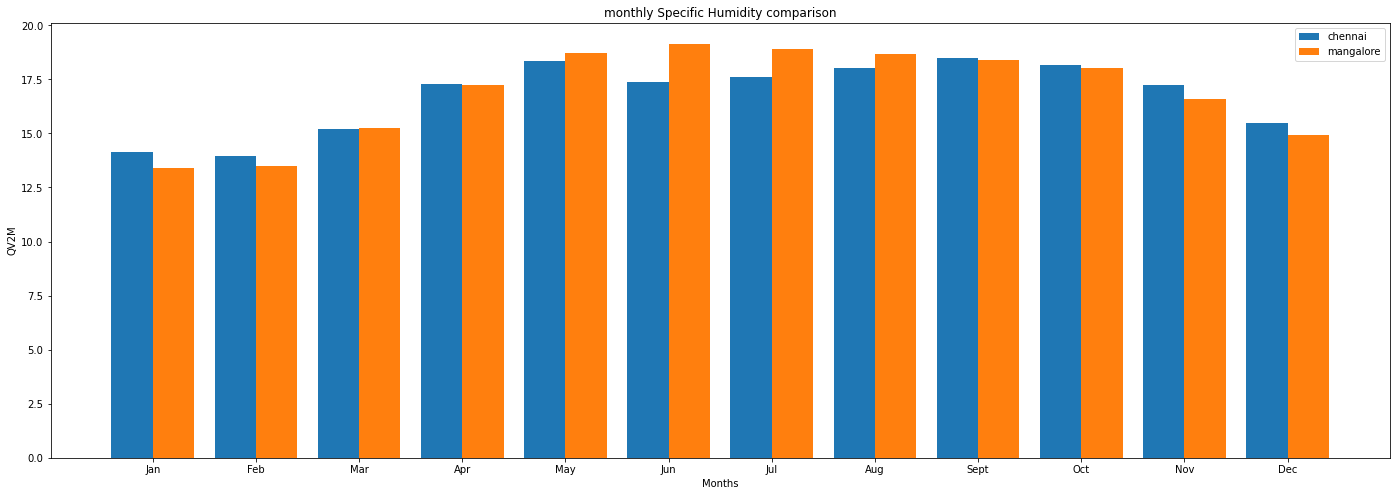

In [111]:
# monthly comparison of avg Specific Humidity between mangalore and chennai 

df_chennai_monthlytemp=monthly_group_mean(df_chennai,2015,'QV2M')
df_mangalore_monthlytemp=monthly_group_mean(df_mangalore,2015,'QV2M')
# df_chennai_monthlytemp.head()
plot_multi_bar(['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', "Nov", "Dec"],
               df_chennai_monthlytemp['QV2M'],df_mangalore_monthlytemp['QV2M'],
               "Months","QV2M","monthly Specific Humidity comparison","chennai","mangalore")